# Introduction of the Data #

In the dynamic landscape of job applications sourced from an aggregator website, our data encapsulates a wealth of information about various employment opportunities. Each entry in our dataset represents a unique job application, meticulously recorded with essential details such as application date, job title, company, job type, required experience, salary, and the perceived interview difficulty. To enhance the organization and analysis of this diverse dataset, we've implemented a structured class hierarchy.

The foundation is laid by the JobApplication class, equipped with a unique identifier for each instance and a string representation method for easy readability.
To cater to the distinct characteristics of STEM and non-STEM job applications, we extend our class hierarchy with subclasses, namely StemJobApplication and NonStemJobApplication. Furthermore, we delve into specifics by introducing subclasses tailored to renowned companies such as Apple, Siemens, and Boeing.

Each company class inherits attributes from its parent class, maintaining consistency while accommodating unique details pertinent to the respective organization.
In the subsequent steps, we put our classes to the test, generating instances like SiemensJobApplication and utilizing a pickle file to retrieve a curated set of objects. Additionally, we leverage the data to construct a CSV file, facilitating comprehensive insights into the aggregated job application data. Armed with this enriched dataset, we embark on a visual journey, creating insightful visualizations that shed light on the distribution and characteristics of job applications within our diverse and dynamic dataset.

# OOP Code

**Creating a class called JobApplication with the following attributes in its constructor (__init__
method) in this order:**

1. date: Application date.
2. title: Job title.
3. company: Company providing job.
4. type: Job’s type.
5. experience: Experience needed for the job (in years).
6. salary: Jobs' salary (in USD).
7. interview_difficulty: Candidates's interview difficulty for the job.
8. Unique ID 

In [35]:
class JobApplication:
    def __init__(self, date, title, company, type, experience, salary, interview_difficulty):
        self.date = date
        self.title = title
        self.company = company
        self.type = type
        self.experience = experience
        self.salary = salary
        self.interview_difficulty = interview_difficulty
        self.unique_id = id(self)
        
    def __str__(self):
        return f"{self.unique_id},{self.date},{self.title},{self.company},{self.type},{self.experience},{self.salary},{self.interview_difficulty}"

**Creating two subclasses:**

StemJobApplication and NonStemJobApplication, both inheriting
from the JobApplication class

In [36]:
class StemJobApplication(JobApplication):
    def __init__(self, date, title, company, experience, salary, interview_difficulty):
        super().__init__(date, title, company, "Stem", experience, salary, interview_difficulty)

class NonStemJobApplication(JobApplication):
    def __init__(self, date, title, company, experience, salary, interview_difficulty):
        super().__init__(date, title, company, "non-Stem", experience, salary, interview_difficulty)

**Creating three additional subclasses:**

Apple, Siemens, Boeing, inheriting from
StemJobApplication and NonStemJobApplication, NonStemJobApplication respectively.

In [37]:
class Apple(StemJobApplication):
    def __init__(self, date, title, experience, salary, interview_difficulty):
        super().__init__(date, title, "Apple", experience, salary, interview_difficulty)

class Siemens(NonStemJobApplication):
    def __init__(self, date, title, experience, salary, interview_difficulty):
        super().__init__(date, title, "Siemens", experience, salary, interview_difficulty)

class Boeing(NonStemJobApplication):
    def __init__(self, date, title, experience, salary, interview_difficulty):
        super().__init__(date, title, "Boeing", experience, salary, interview_difficulty)

**Testing code with hardcoded data**

In [38]:
SiemensJobApplication = Siemens("2022-11-15","titleA", 2, 641, 86.06)
print(str(SiemensJobApplication))

2404199273168,2022-11-15,titleA,Siemens,non-Stem,2,641,86.06


**Creating CSV File out of pickle file**

In [39]:
import pickle

with open('JobApplicationpkl50104.dat', 'rb') as pickle_file:
    objects = pickle.load(pickle_file)

with open('data.csv', 'w') as f:
    f.write("unique_id,date,title,company,type,experience,salary,interview_difficulty\n")
    for obj in objects:
        f.write(str(obj) + '\n')

# Visualization Code

## Reading, Parsing, Cleaning, and Preparing Data

In [40]:
#Import Pandas library, NumPy library, pyplot module from Matplotlib, and Matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [41]:
#Using the `read_csv` function from Pandas to read CSV file.

job_application_data = pd.read_csv('data.csv')

#Output the DataFrame

job_application_data

,unique_id,date,title,company,type,experience,salary,interview_difficulty
0,134289282727120,2022-09-06,eletrician,Siemens,non-Tech,2.0,85233.0,71.39
1,134289282720832,2022-09-05,trainee,Boeing,non-Tech,2.0,88501.0,97.11
2,134289282724480,2022-12-03,mechanic,Siemens,non-Tech,2.0,88811.0,69.47
3,134289282724240,2022-12-08,trainee,Boeing,non-Tech,2.0,82580.0,97.32
4,134289282721936,2022-11-19,trainee,Siemens,non-Tech,3.0,88266.0,75.94
...,...,...,...,...,...,...,...,...
9995,134289273140608,2022-10-24,database engineer,Apple,Tech,2.0,71078.0,82.73
9996,134289273140656,2022-11-27,devops engineer,Apple,Tech,3.0,88165.0,73.95
9997,134289273140704,2022-12-17,trainee,Boeing,non-Tech,1.0,85284.0,85.74
9998,134289273140752,2022-10-20,mechanic,Boeing,non-Tech,1.0,82208.0,90.89


In [42]:
#Show column names of the DataFrame

job_application_data.columns

Index(['unique_id', 'date', 'title', 'company', 'type', 'experience', 'salary',
       'interview_difficulty'],
      dtype='object')

In [43]:
#Renaming Columns

job_application_data.rename(
    columns = {"unique_id": "Unique_ID", 'date': 'Application_Date','title': 'Job_Title', 'company': 'Company', 'type': "Job_Type",'experience': 'Years_Experience_Needed', 'salary': 'Salary(USD)','interview_difficulty': "Interview_Difficulty"},
    inplace=True)

In [44]:
#Show first 5 rows

job_application_data.head()

,Unique_ID,Application_Date,Job_Title,Company,Job_Type,Years_Experience_Needed,Salary(USD),Interview_Difficulty
0,134289282727120,2022-09-06,eletrician,Siemens,non-Tech,2.0,85233.0,71.39
1,134289282720832,2022-09-05,trainee,Boeing,non-Tech,2.0,88501.0,97.11
2,134289282724480,2022-12-03,mechanic,Siemens,non-Tech,2.0,88811.0,69.47
3,134289282724240,2022-12-08,trainee,Boeing,non-Tech,2.0,82580.0,97.32
4,134289282721936,2022-11-19,trainee,Siemens,non-Tech,3.0,88266.0,75.94


### Finding NaN & Null Values to Clean Data
Used `isna(), isnull(), sum()` to count the number of missing or NaN (Not-a-Number) values in each column. The following columns contained missing or NaN values:
- Application_Date
- Years_Experience_Needed
- Salary(USD)
- Interview_Difficulty

In [45]:
#Sum of NaN values

job_application_data.isna().sum()

Unique_ID                    0
Application_Date           451
Job_Title                    0
Company                      0
Job_Type                     0
Years_Experience_Needed    438
Salary(USD)                431
Interview_Difficulty       439
dtype: int64

In [46]:
#Sum of Null values

job_application_data.isnull().sum()

Unique_ID                    0
Application_Date           451
Job_Title                    0
Company                      0
Job_Type                     0
Years_Experience_Needed    438
Salary(USD)                431
Interview_Difficulty       439
dtype: int64

In [47]:
#total # of missing values in dataframe

job_application_data.isnull().sum().sum()

1759

### Determining if NaN & Null Values are Categorical or Numerical Variables
Used `info()` to see Dtype (Data Type) of Values.
Objects are generally categorical values, whereas int64 and float64 are numerical values.

- Application_Date -> object -> Categorical Value
- Years_Experience_Needed -> float64 -> Numerical Value
- Salary(USD) -> float64 -> Numerical Value
- Interview_Difficulty -> float64 -> Numerical Value

In [48]:
#Show summary of DataFrame

job_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique_ID                10000 non-null  int64  
 1   Application_Date         9549 non-null   object 
 2   Job_Title                10000 non-null  object 
 3   Company                  10000 non-null  object 
 4   Job_Type                 10000 non-null  object 
 5   Years_Experience_Needed  9562 non-null   float64
 6   Salary(USD)              9569 non-null   float64
 7   Interview_Difficulty     9561 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


### Replacing NaN & Null Values with mode, median, or mean.
- Application_Date -> object -> Categorical Value -> Mode
- Years_Experience_Needed -> float64 -> Numerical Value -> Mean
- Salary(USD) -> float64 -> Numerical Value -> Median
- Interview_Difficulty -> float64 -> Numerical Value -> Mean

In [49]:
#Replace NaN or Null in Application_Date with mode. 

job_application_data['Application_Date'] = job_application_data['Application_Date'].fillna(job_application_data['Application_Date'].mode()[0])

In [50]:
#Checking field that had NaN or NULL value for Application_Date

job_application_data.loc[41]

Unique_ID                  134290184548368
Application_Date                2022-12-07
Job_Title                  devops engineer
Company                              Apple
Job_Type                              Tech
Years_Experience_Needed                2.0
Salary(USD)                        84556.0
Interview_Difficulty                 73.89
Name: 41, dtype: object

In [51]:
#Replace NaN or Null in Years_Experience_Needed -> Aggregate mean at level of granularity of 'Job_Title'

job_application_data['Years_Experience_Needed'] = job_application_data.groupby('Job_Title')['Years_Experience_Needed'].transform(lambda x: x.fillna(x.mean()))

In [52]:
#Checking field that had NaN or NULL value for Years_Experience Needed

job_application_data.loc[19]

Unique_ID                  134290184541312
Application_Date                2022-09-16
Job_Title                         designer
Company                             Boeing
Job_Type                          non-Tech
Years_Experience_Needed            1.97486
Salary(USD)                        76332.0
Interview_Difficulty                 90.89
Name: 19, dtype: object

In [53]:
#Replace NaN or Null in Salary(USD) -> Aggregate median at level of granularity of 'Job_Title'

job_application_data['Salary(USD)'] = job_application_data.groupby('Job_Title')['Salary(USD)'].transform(lambda x: x.fillna(x.median()))

In [54]:
#Checking field that had NaN or NULL value for Salary(USD)

job_application_data.loc[27]

Unique_ID                  134290184547600
Application_Date                2022-12-20
Job_Title                  devops engineer
Company                              Apple
Job_Type                              Tech
Years_Experience_Needed                2.0
Salary(USD)                        80241.5
Interview_Difficulty                 91.63
Name: 27, dtype: object

In [55]:
#Replace NaN or Null in Interview_Difficulty -> Aggregate mean at level of granularity of 'Job_Title'

job_application_data['Interview_Difficulty'] = job_application_data.groupby('Job_Title')['Interview_Difficulty'].transform(lambda x: x.fillna(x.mean()))

In [56]:
#Checking field that had NaN or NULL value for Interview_Difficulty

job_application_data.loc[44]

Unique_ID                  134290184549232
Application_Date                2022-10-01
Job_Title                         mechanic
Company                            Siemens
Job_Type                          non-Tech
Years_Experience_Needed                2.0
Salary(USD)                        80025.0
Interview_Difficulty             79.755816
Name: 44, dtype: object

In [57]:
#rechecking for missing values in data frame

job_application_data.isna().sum()

Unique_ID                  0
Application_Date           0
Job_Title                  0
Company                    0
Job_Type                   0
Years_Experience_Needed    0
Salary(USD)                0
Interview_Difficulty       0
dtype: int64

# Visualization

## Bar Chart

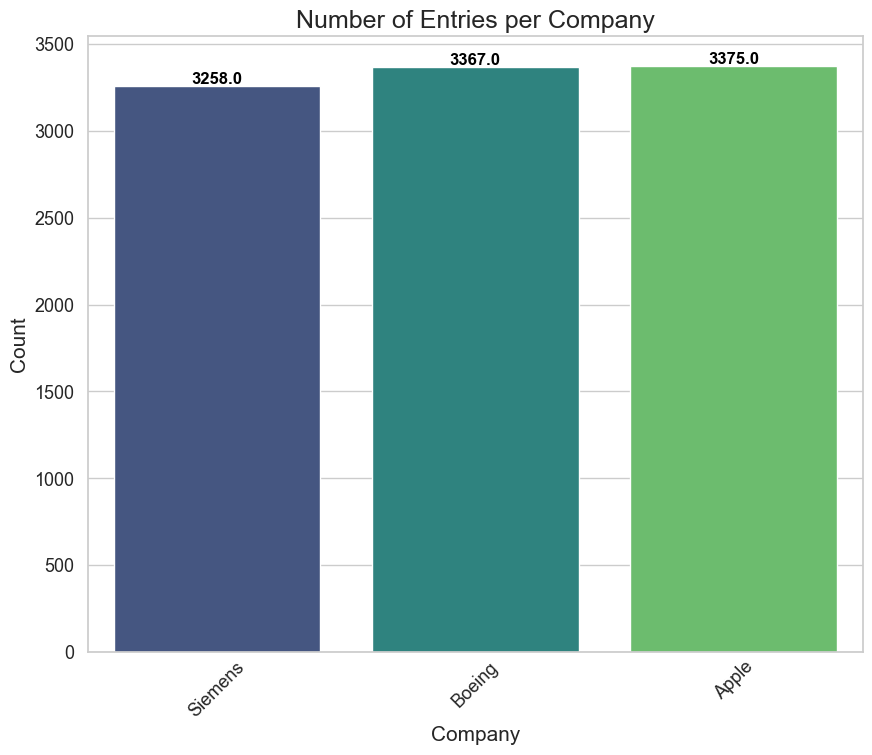

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")  
 
ax = sns.countplot(x='Company', data=job_application_data, palette='viridis')
 
 
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top', fontsize=12, color='black', xytext=(0, 10), weight='bold',
                textcoords='offset points')
 
 
plt.title('Number of Entries per Company', fontsize=18)
plt.xlabel('Company', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='center', fontsize=13)
plt.yticks(fontsize=13)
 
ax.tick_params(axis='x', which='major', pad=-2)
 
plt.show()

TEXT EXT

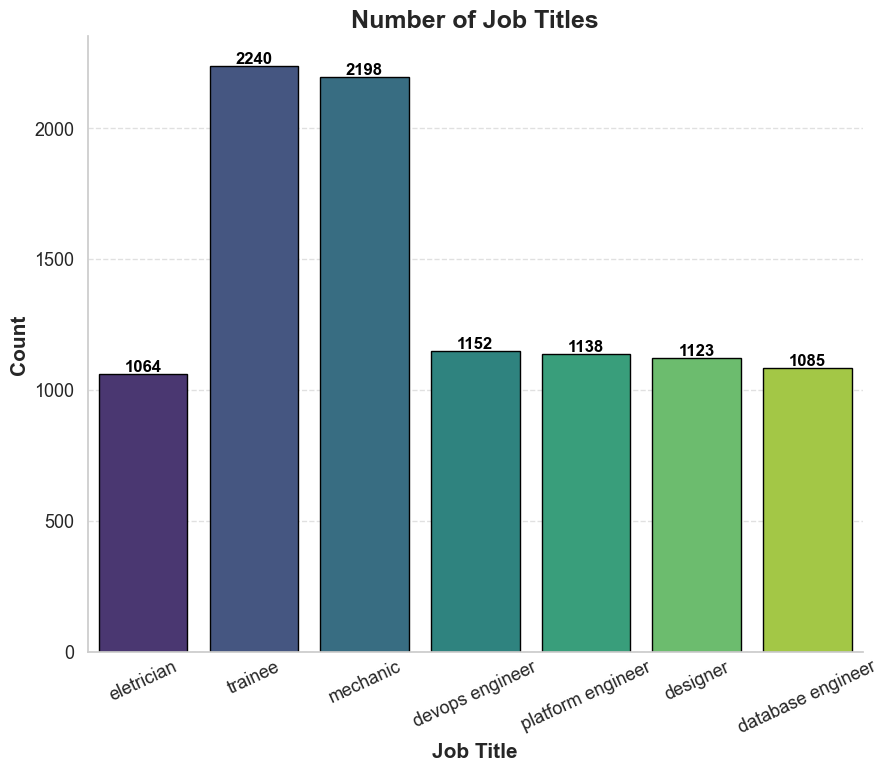

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(10, 8))
 
sns.set_theme(style="whitegrid")
 
ax = sns.countplot(x='Job_Title', data=job_application_data, palette='viridis', edgecolor='black')

for patch in ax.patches:
    patch.set_width(0.8)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='top', fontsize=12, weight='bold', color='black', xytext=(0, 10),
                textcoords='offset points')
 
 
plt.title('Number of Job Titles', fontsize=18, weight='bold')
plt.xlabel('Job Title', fontsize=15, weight='bold')
plt.ylabel('Count', fontsize=15, weight='bold')
 
plt.xticks(rotation=25, ha='center', fontsize=13)
 
ax.tick_params(axis='both', which='major', labelsize=13)
 
sns.despine()

plt.grid(axis='y', linestyle='--', alpha=0.6)

ax.tick_params(axis='x', which='major', pad=-2)

plt.show()

TEXT TEXT

# Box Plot

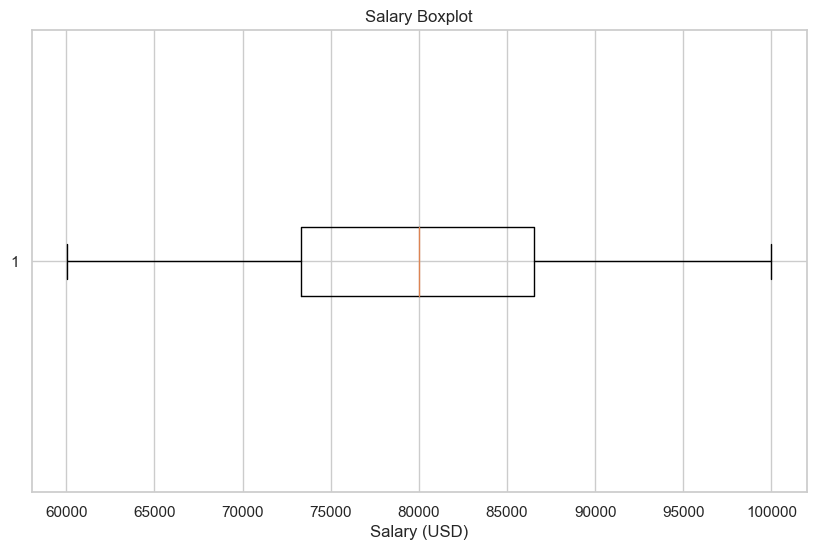

In [60]:
#boxplot of the 'salary' column:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(job_application_data['Salary(USD)'], vert=False)
plt.xticks(range(60000, 105000, 5000))
plt.title('Salary Boxplot')
plt.xlabel('Salary (USD)')
#plt.grid(True)
plt.show()

* Median salary of employees is $80,000
* IQR is between $73,000 and $86,500
* Not much variability in salaries for the middle 50%
* Long whiskers which represent great variabilities in the salaries
* Central median and a balanced distribution 

## Line Plot

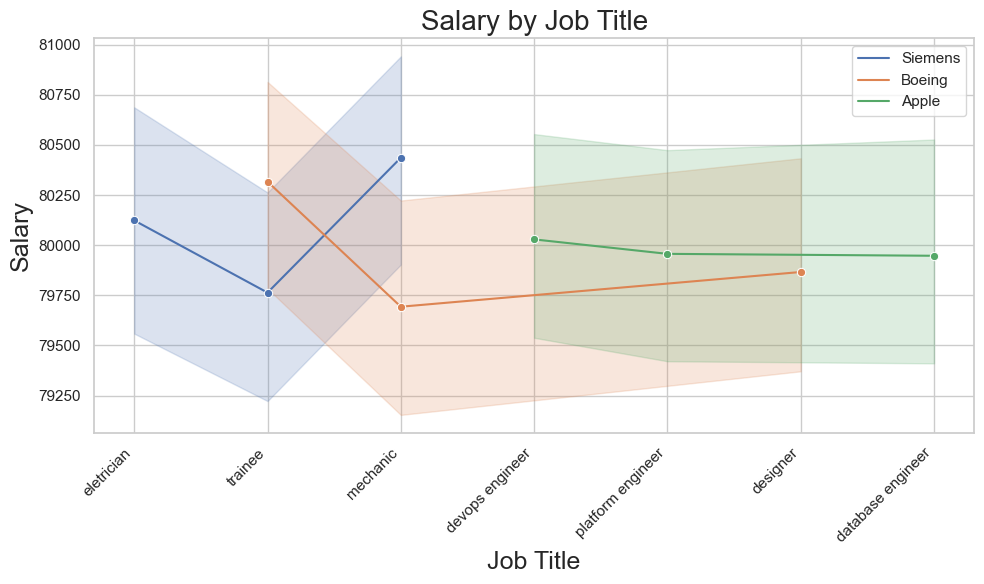

In [61]:
#lineplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Job_Title', y='Salary(USD)', data=job_application_data, marker='o', hue='Company')
plt.title('Salary by Job Title', fontsize=20)
plt.xlabel('Job Title', fontsize=18)
plt.ylabel('Salary', fontsize=18)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The salary by job title graph allows an understanding of which roles are considered as most crucial within a certain firm and which ones should be paid the highest salary.
This shows how the companies value certain skills, experience or responsibility and this leads to variations in salary across job titles.
This information is of great worth to potential employees of these firms who wish to know relative importance and compensation associated with different job titles.

* Simens offer the highest pay to mechanics. Electricians’ salary is less than the trainee.
* As indicated, trainees in Boeing have the highest compensations among the listed job titles.
* Mechanics salaries are the lowest while designers come after as salaries follow.
* From among the mentioned positions, DevOps Engineers at Apple have the highest salary.
* The Platform engineers earn comparatively and Database Engineers less than average.


## Scatter Plot

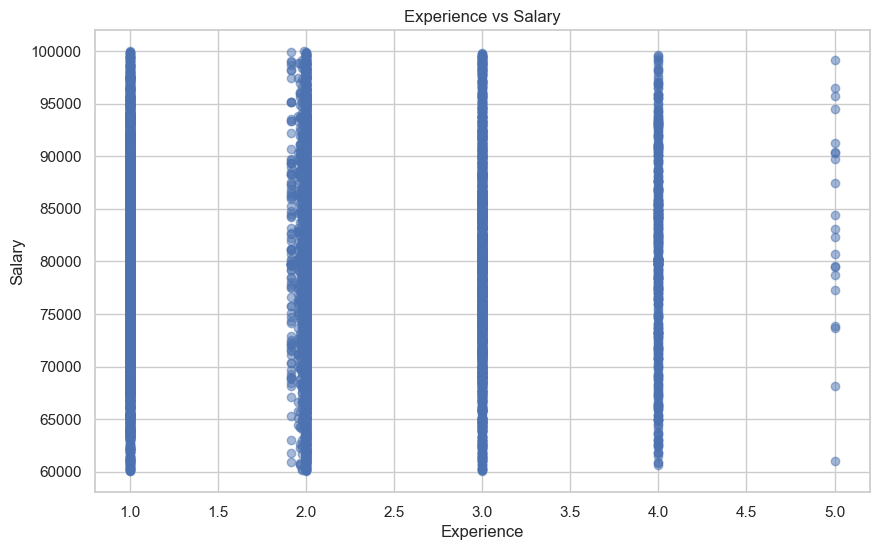

In [62]:
#Scatter Plot
#scatter plot showing 'experience' against 'salary':

plt.figure(figsize=(10, 6))
plt.scatter(job_application_data['Years_Experience_Needed'], job_application_data['Salary(USD)'], alpha=0.5)
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


* 1-4 years of experience have wide range of salaries
* Opportunities to improve for entry level employees
* Most salaries for 5 years experience is more than $75,000
* As years of experience increases, the variability of salaries decreases

## Histogram

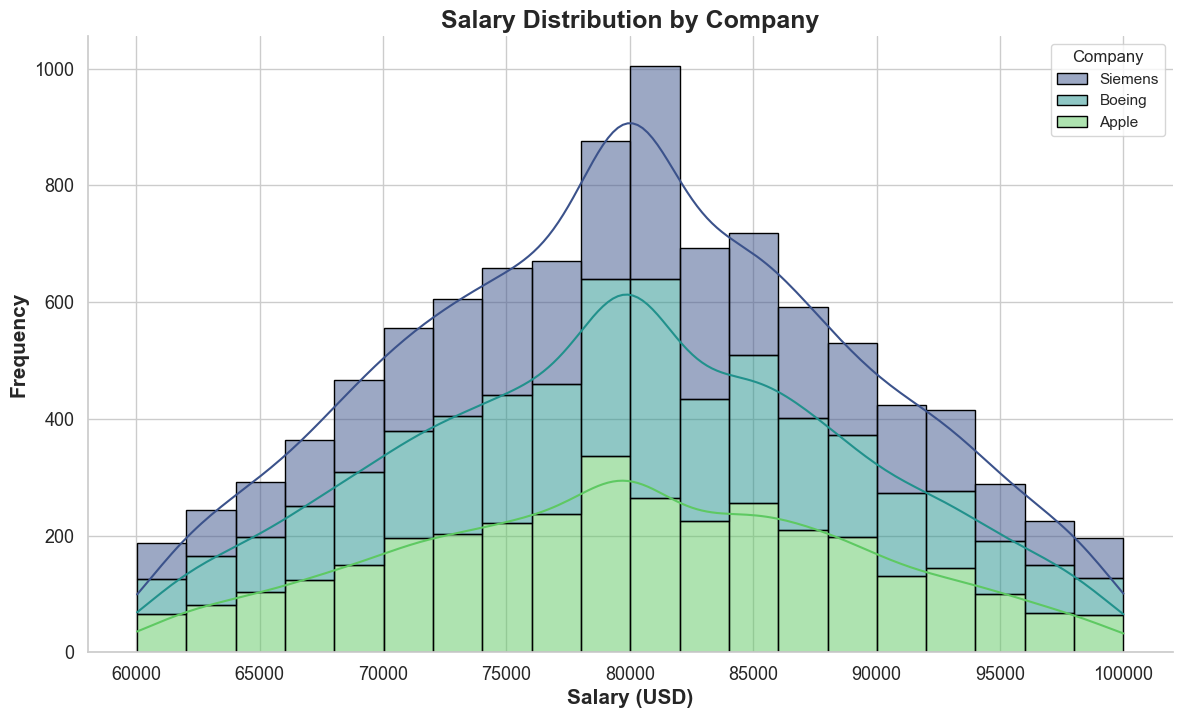

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
 
sns.set_theme(style="whitegrid")

g = sns.histplot(data=job_application_data, x='Salary(USD)', hue='Company', multiple='stack',edgecolor='black', palette='viridis', kde=True, bins=20)  # Adjust the number of bins as needed 
g.set_title('Salary Distribution by Company', fontsize=18, weight='bold')
g.set_xlabel('Salary (USD)', fontsize=15, weight='bold')
g.set_ylabel('Frequency', fontsize=15, weight='bold')
g.tick_params(axis='both', which='major', labelsize=13)

sns.despine()

plt.show()

**Salary Distribution by Company:**

x-axis represents the 'Salary(USD)' variable, indicating the different salary values within the dataset.

* Each bin on the x-axis corresponds to a specific range of salary values. The y-axis represents the 'Frequency,' indicating the count or frequency of job applications falling within each salary range.

* The histogram is further enhanced by stacking bars for each company, visualized using different colors, offering insights into the distribution of salaries across various companies.

* The kernel density estimate (KDE) line provides a smooth representation of the overall distribution pattern, complementing the histogram bars.

* For all 3 companies the distribution is symmetrical and the peak or average salary for each company is around 78000 to 82000 USD.

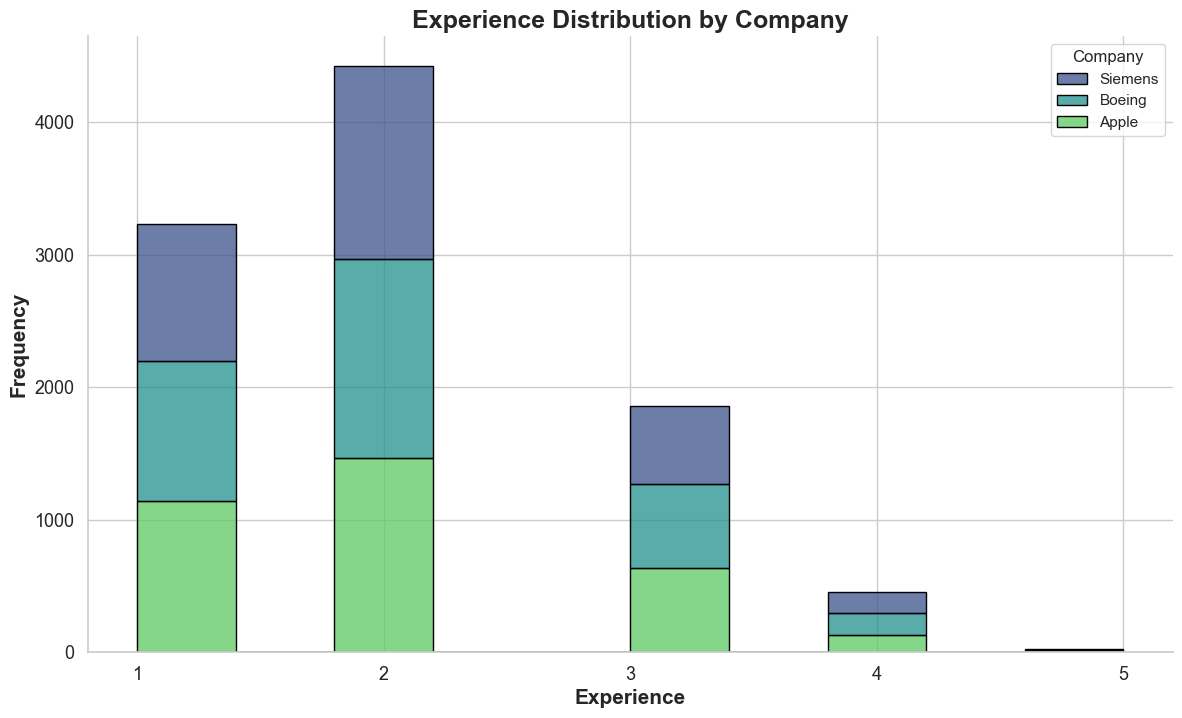

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(14, 8))
 
sns.set_theme(style="whitegrid")
 
g = sns.histplot(data=job_application_data, x='Years_Experience_Needed', hue='Company', multiple='stack',
                 edgecolor='black', palette='viridis', bins=10)
 
g.set_title('Experience Distribution by Company', fontsize=18, weight='bold')
g.set_xlabel('Experience', fontsize=15, weight='bold')
g.set_ylabel('Frequency', fontsize=15, weight='bold')
 
g.set(xticks=range(int(job_application_data['Years_Experience_Needed'].min()), int(job_application_data['Years_Experience_Needed'].max()) + 1))
 
g.tick_params(axis='both', which='major', labelsize=13)
 
sns.despine()
 
plt.show()

**Experience Distribution by Company:**  

We can see a stacked histogram where each bar represents frequency of job applications received based on the required years of experience with 3 companies differentiated by colors.

* About 4500 Job applications require  candidates with 2 years of experience and very few applications or roles with more than 3 years.
* The histogram shows the data for 3 companies differentiated by colors.

## Pie Chart

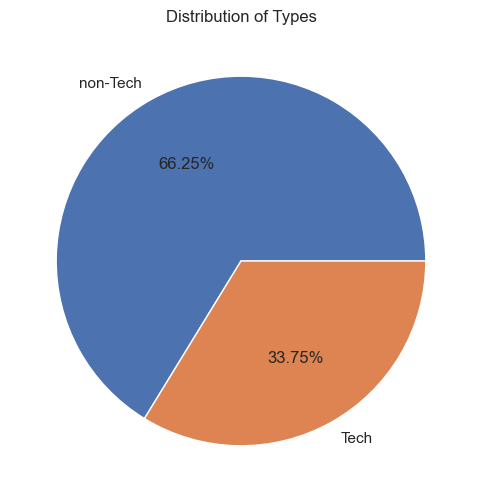

In [65]:
#pie chart showing the distribution of 'type':

plt.figure(figsize=(10, 6))
#job_application_data['Job_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.pie(job_application_data['Job_Type'].value_counts(),labels=job_application_data['Job_Type'].value_counts().index, autopct = '%2.2f%%')
plt.title('Distribution of Types')
plt.ylabel('')
plt.show()

The pie chart depicts the distribution of job categories in the dataset. The different slices of pie represent different job types, and the size of each slice shows the percentage of that type of job in the dataset. In this particular issue, ‘Non-Tech’ jobs have been recorded more at about 6625 occurrences, which account for 66.25%, whereas ‘Tech’ jobs have been noted as being slightly lower at about 3375 occurrences the chart also indicates the percentages involved.

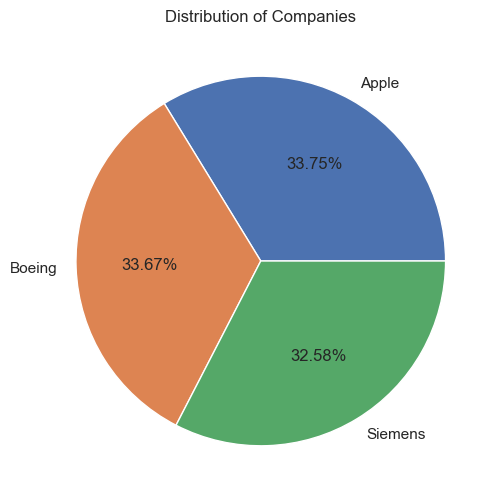

In [66]:
#pie chart showing the distribution of 'Companies':

plt.figure(figsize=(10, 6))
#job_application_data['Company'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.pie(job_application_data['Company'].value_counts(),labels=job_application_data['Company'].value_counts().index, autopct = '%2.2f%%')
plt.title('Distribution of Companies')
plt.ylabel('')
plt.show()

The representation of the distribution of job applicants, which is presented by the pie chart. The size of the slices of the pie represents the number of applications sent by each company. Here, ‘Apple’ contributes to about 33.75%, ‘Boeing’ accounts for around 33.67% and ‘Siemens’ stands at about 32.58%. In addition, the chart shows the percentages also.

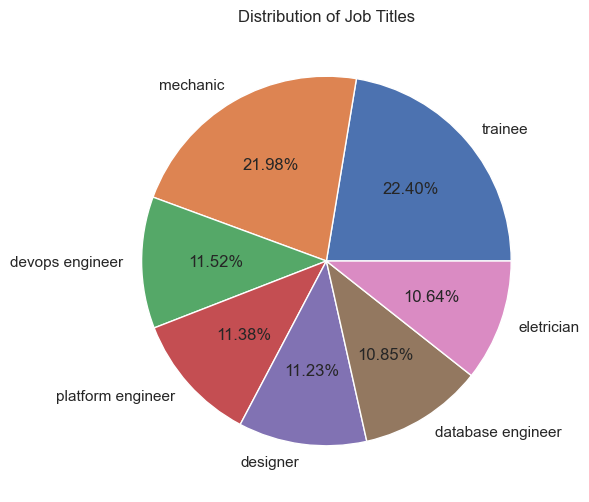

In [67]:
plt.figure(figsize=(10, 6))
#job_application_data['Job_Title'].value_counts().plot(kind='pie', autopct='%2.2f%%')
plt.pie(job_application_data['Job_Title'].value_counts(),labels=job_application_data['Job_Title'].value_counts().index, autopct = '%2.2f%%')
plt.title('Distribution of Job Titles')
plt.ylabel('')
plt.show()

A pie chart graphically reflects the proportion of job titles in the dataset. The pie chart has slices that represent job titles and the size of each slice shows the number of job applications for this title. In this particular instance, trainee takes up around 22.40%, mechanic approximately 21.98%, devops engineer roughly 11.52%, platform engineer about 11.38%, designer roughly 11.23%, database engineer almost These percentages are also shown on a chart.

## Heat Map

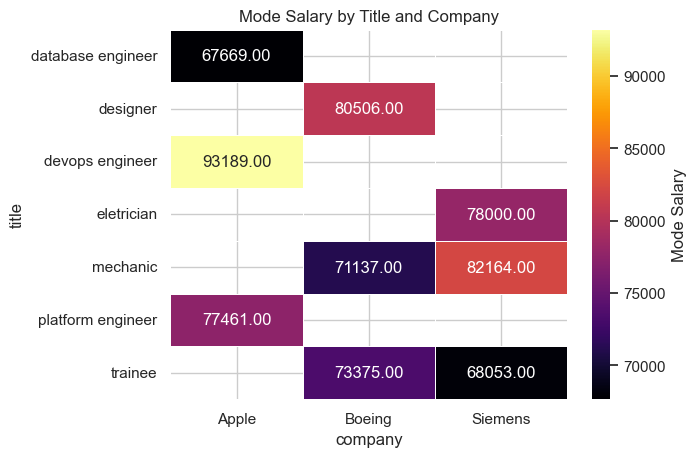

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV
job_application_data = pd.read_csv('data.csv')

# Pivot the data to have 'title' on the y-axis, 'company' on the x-axis, and 'salary' mode as values
heatmap_data = job_application_data.pivot_table(values='salary', index='title', columns='company', aggfunc=lambda x: x.mode().iloc[0])

# Create heatmap
sns.heatmap(heatmap_data, cmap="inferno", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Mode Salary'})
plt.title('Mode Salary by Title and Company')
plt.show()

### Heat Map Trends

The heat map above shows the most common salaries comparing title and the companies.

**Highest Salary**
* Apple pays their devops engineers the highest salary $93,189.00 between the three companies.
* Designers at Boeing make the highest salary in the company.
* At Siemens, mechanics have the highest salary. In fact its the second highest between the companies.

**Lowest Salary**
* Apple also had the lowest salary between the three companies. They pay their database engineers $67,669.00
* At Boeing theres only a $2,000 difference between a mechanic and trainee.
* Whereas at Siemens, trainees made the second lowest salary between the companies.

**Type of Employees**
* Apple mainly has mainly technical positions, which is not suprising since they are an electronics and software company.
* Boeing and Siemens both have mechanics and trainees due to the work with aerospace, aircraft engines and industrial manufacturing.

# Conclusion

* Average salary among all these job applications is $80,000.
* Most job applications have 2 years of work experience and are in a non-tech field.
* We can tell that the salaries are very unstable throughout the year, which means that there might be uncertainty in the job market. 
* There is a lot of competition for entry level jobs and not a lot of job applicants have significant experience.
* There are not many people that are applying for jobs that require a lot of experience versus just one year of work experience.